In [1]:
%matplotlib inline
import numpy as np
import src.io as io
import src.components as cmpnt
import src.rigidbodies as rb

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


`pdb_filename` is the input PDB file containing the structural ensemble, `ids_filename` is the input PDB file containing the list of IDs we will consider, and `jobname` is the basename of all output files from the analysis.

In [61]:
pdb_filename = 'data/ribosome_thermo_ssu.pdb'
ids_filename = 'ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_cluster_5_mean.pdb' #'ribosome_thermo_ssu/all_cluster_1_mean.pdb'
jobname  = 'ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_' 

Load dataset and filter out eventual outliers (any point above ic_thresh - not used here)

In [62]:
traj, ids = io.load_dataset(pdb_filename,ids_filename=ids_filename,superpose=True)
print('Number of items: ',len(ids))

Number of items:  31


Perform hierarchical clustering in component space, using the IC distance

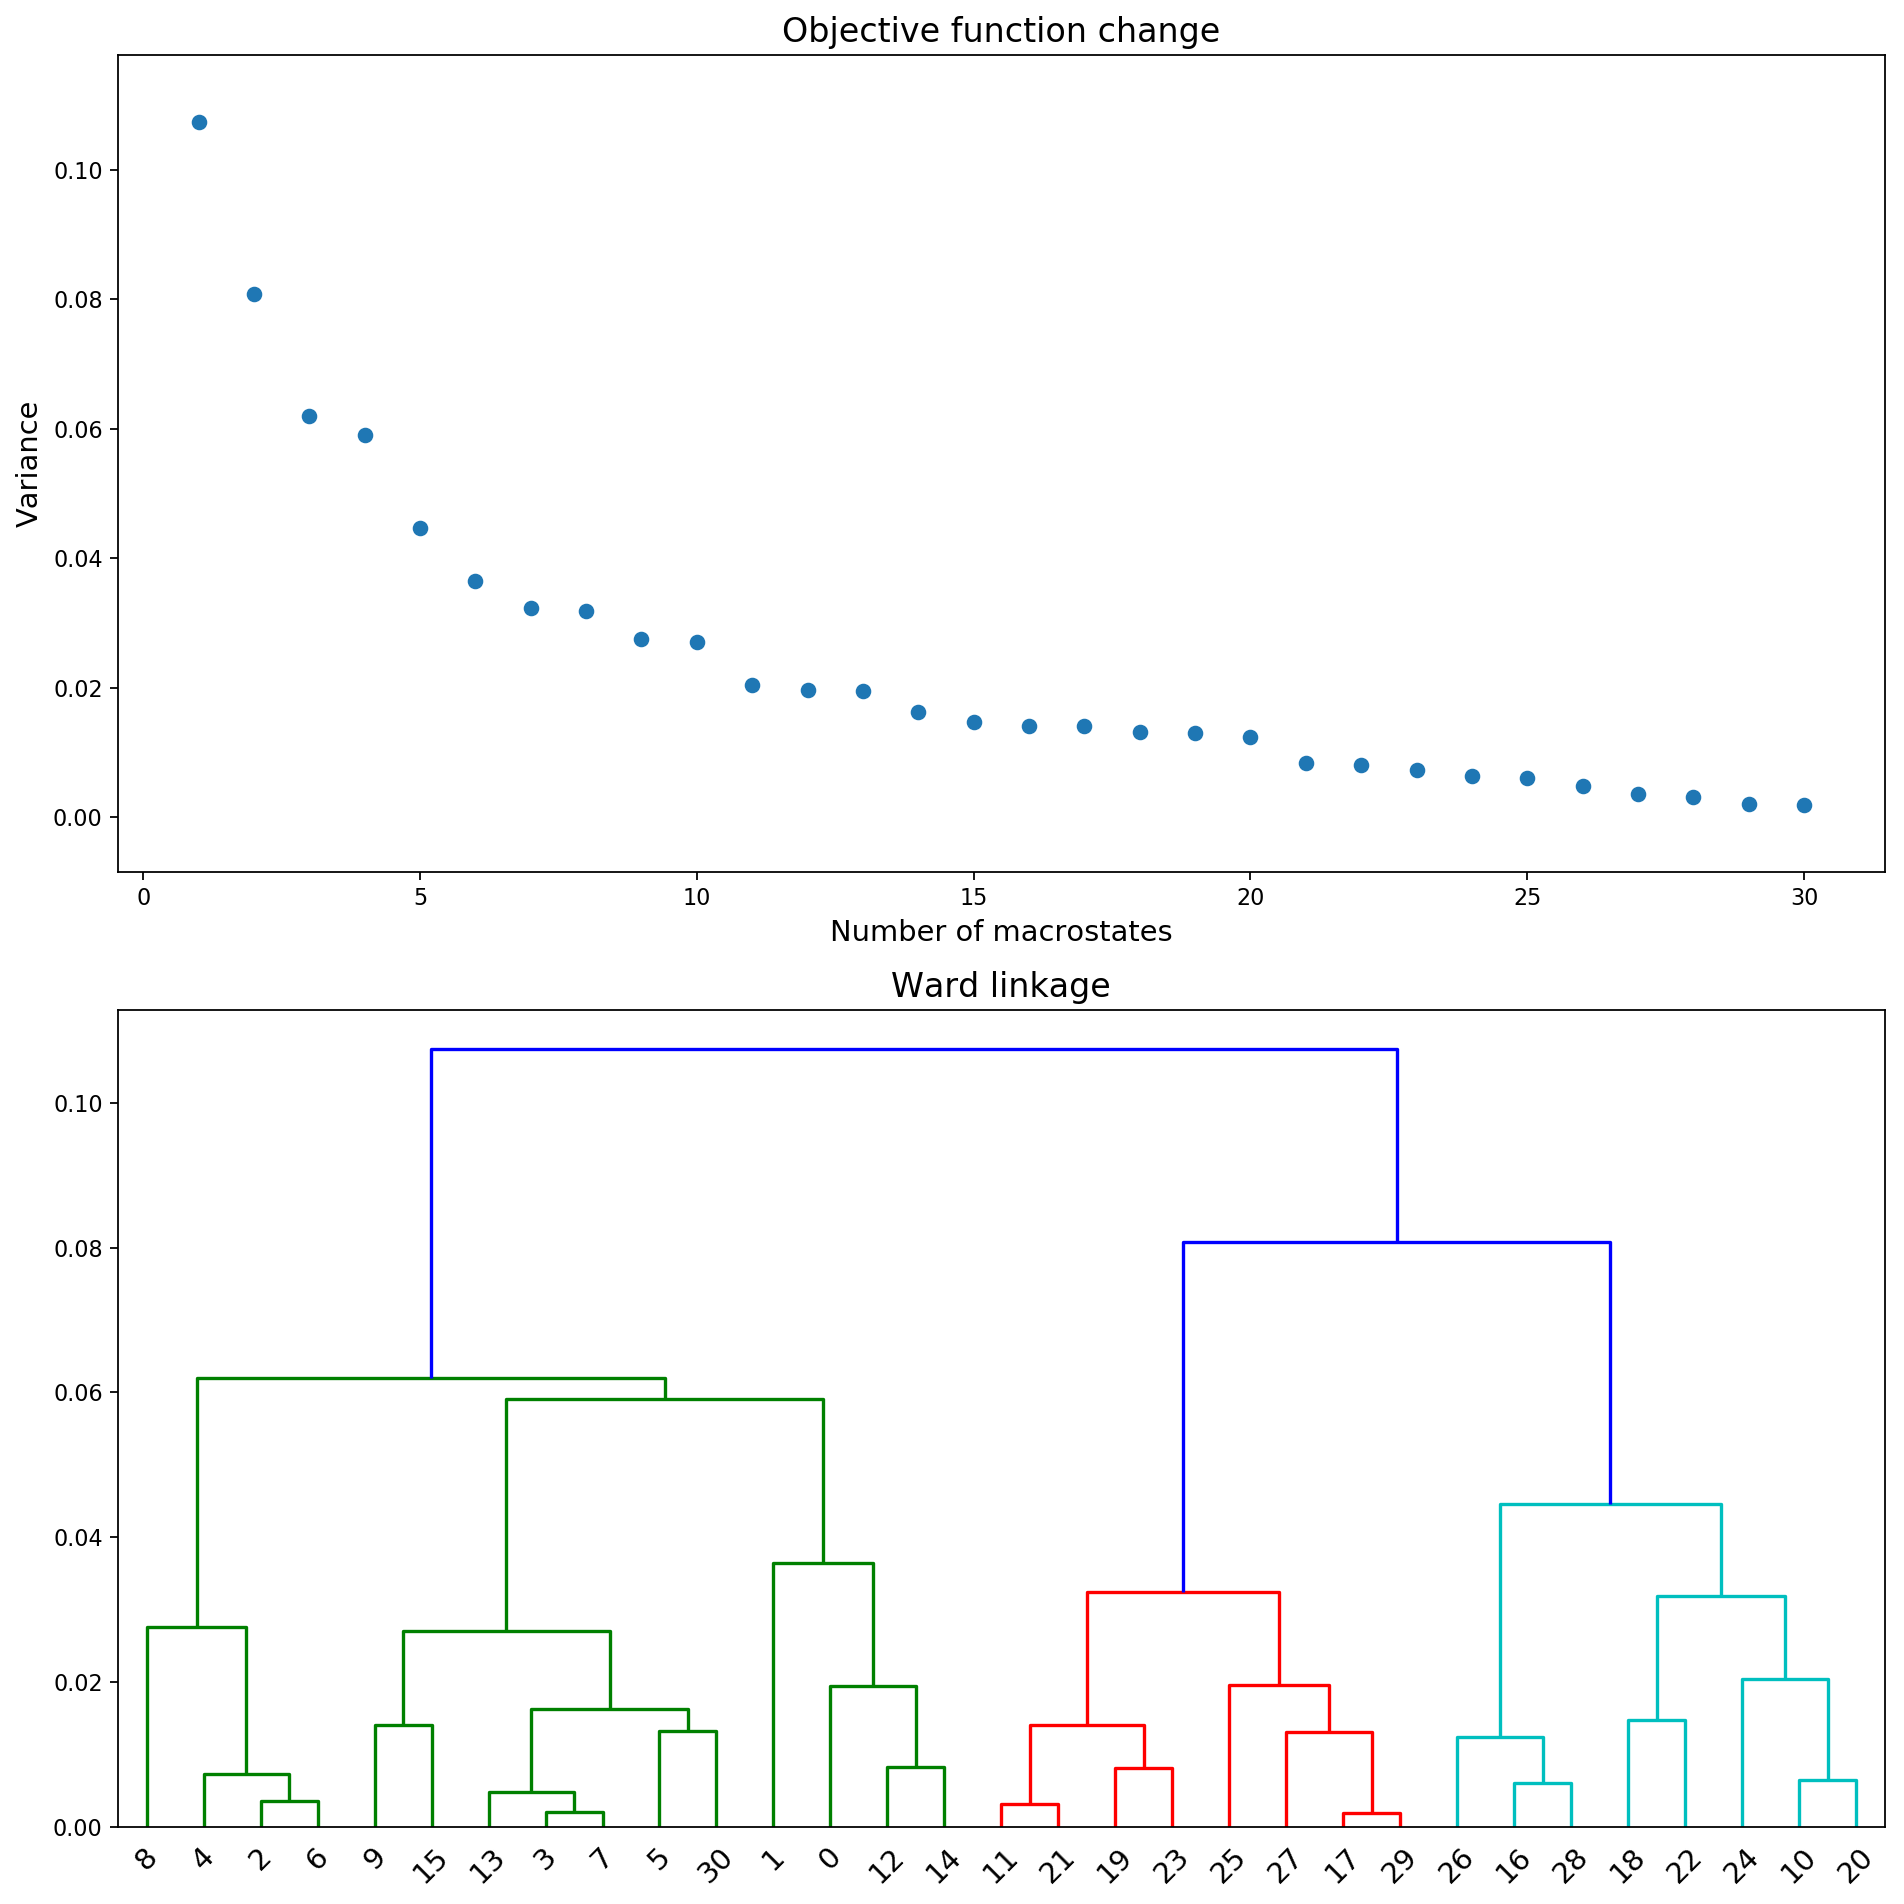

In [63]:
clusters = cmpnt.cluster(traj,ids,title=jobname)

Based on the result above, we decide how many clusters to save, and write them to output.

> ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_cluster_1
wrote  ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_cluster_1_mean.pdb  :  ['1vvj+01.cif' '1vvj+02.cif' '4l47+01.cif' '4l47+02.cif' '4l71+01.cif'
 '4l71+02.cif' '4lel+01.cif' '4lel+02.cif' '4lfz+01.cif' '4lfz+02.cif'
 '4lsk+01.cif' '4lsk+02.cif' '4lt8+01.cif' '4lt8+02.cif' '4v6g+02.cif']
> ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_cluster_2
wrote  ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_cluster_2_mean.pdb  :  ['4lnt+02.cif' '4p6f+02.cif' '4p70+02.cif' '4tua+02.cif' '4tub+02.cif'
 '4tuc+02.cif' '4tud+02.cif' '4tue+02.cif']
> ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_cluster_3
wrote  ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5_cluster_3_mean.pdb  :  ['4lnt+01.cif' '4p6f+01.cif' '4p70+01.cif' '4tua+01.cif' '4tub+01.cif'
 '4tuc+01.cif' '4tud+01.cif' '4tue+01.cif']
Principal Component Analysis (step 0)


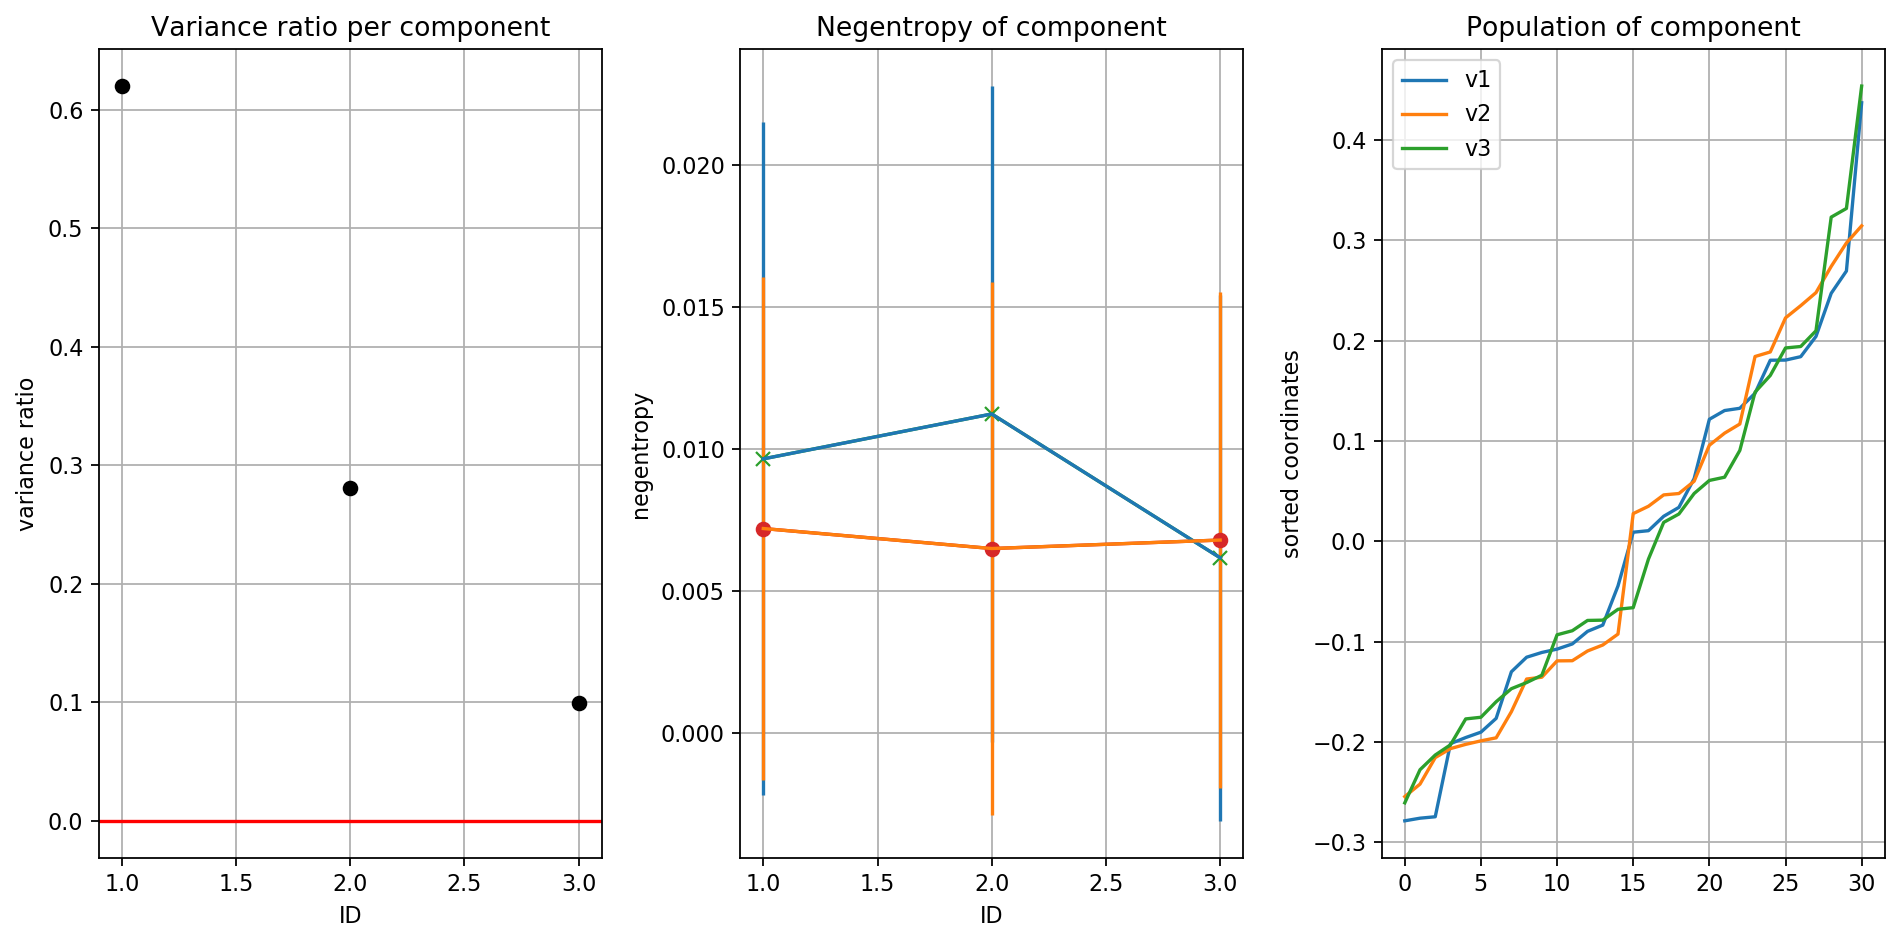

Independent Component Analysis (step 1)


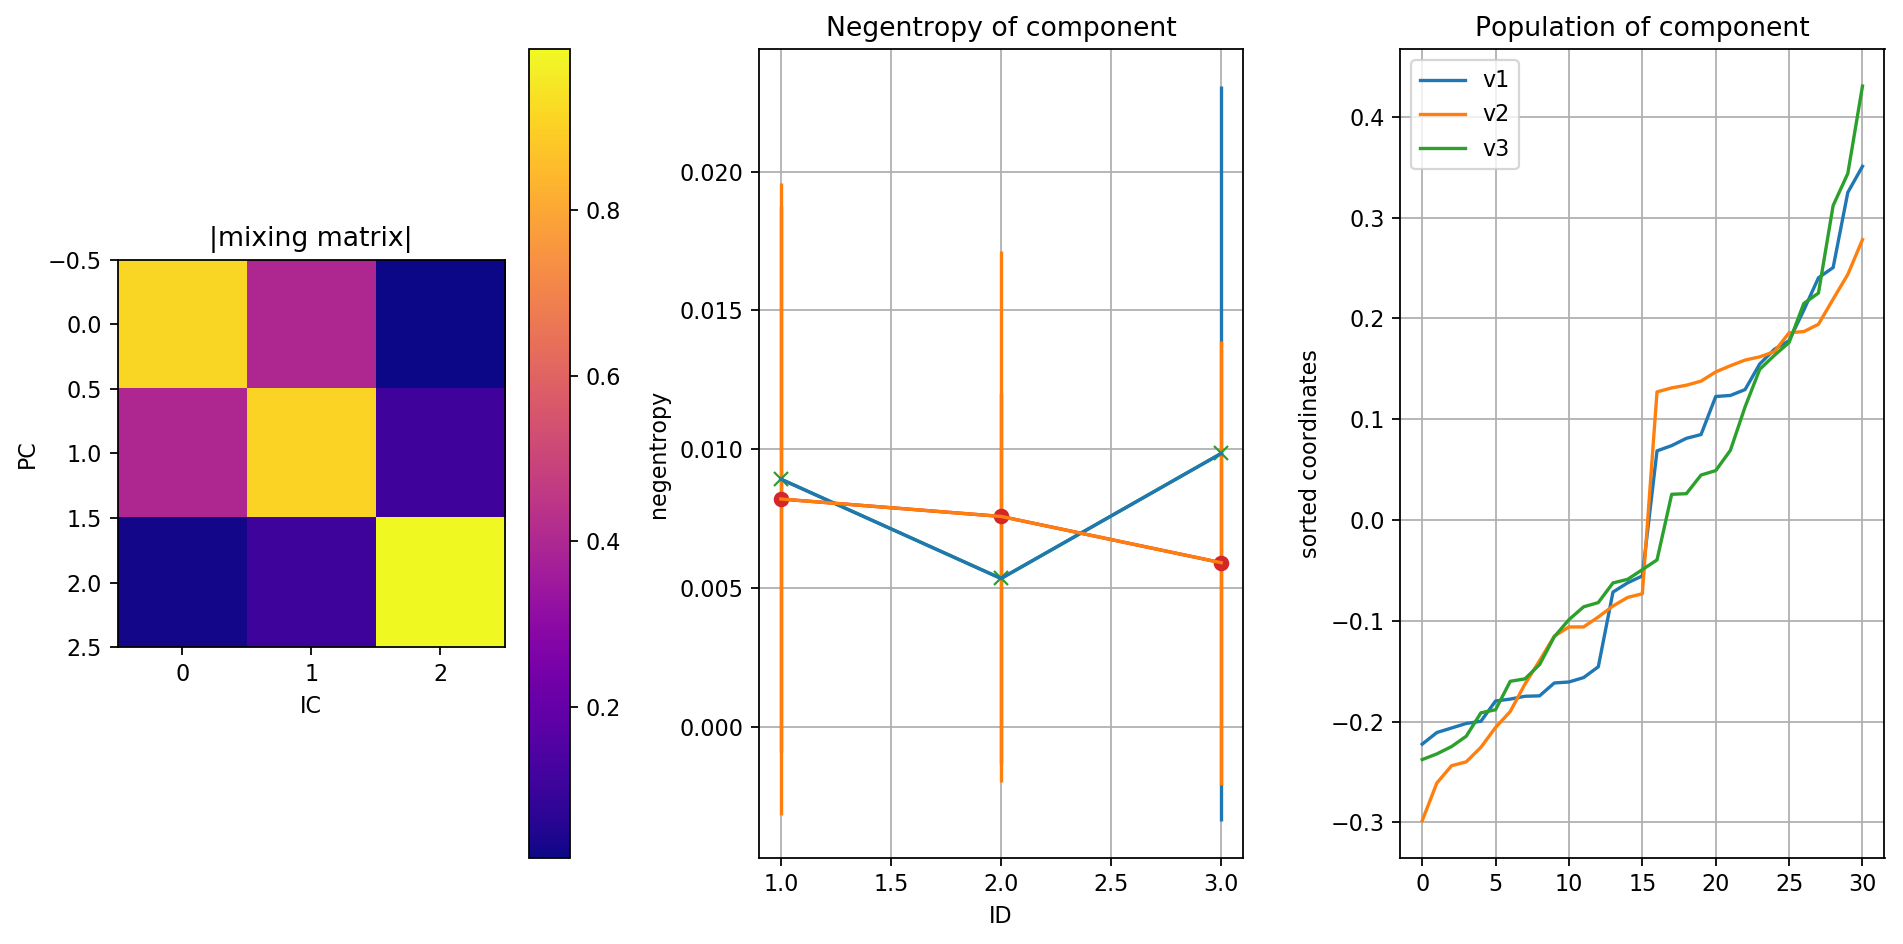

projection of data in component space


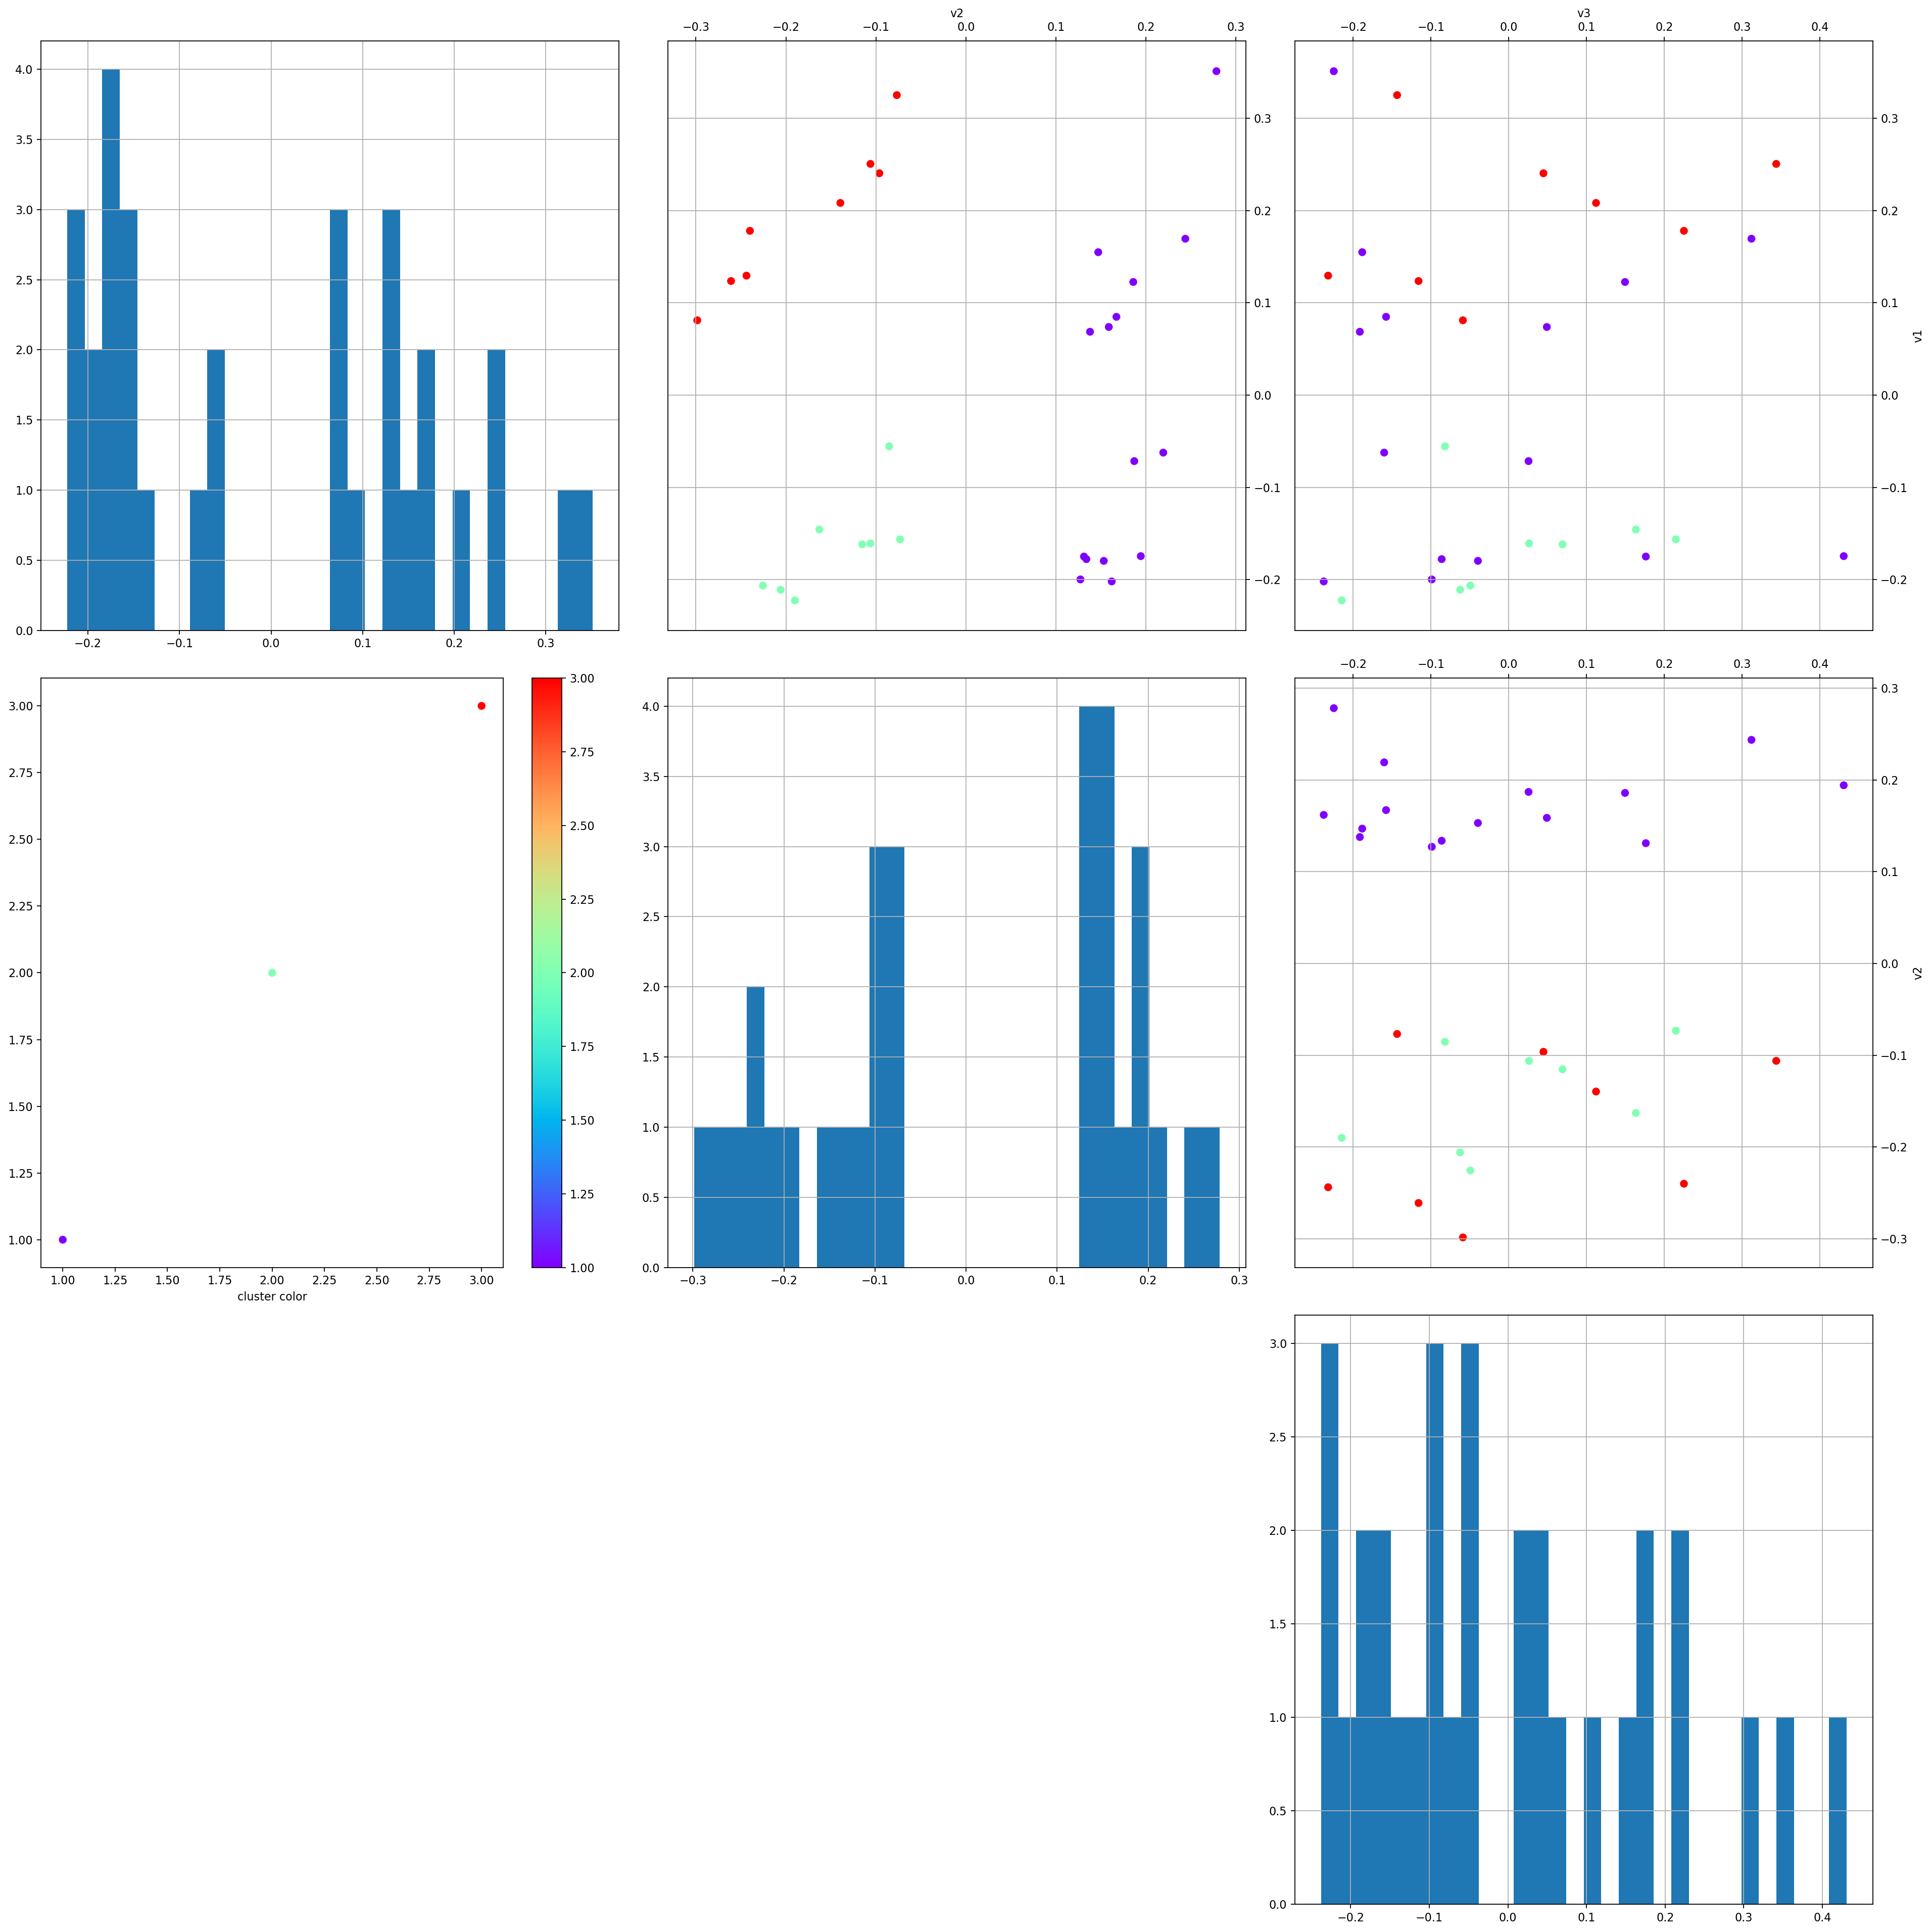

wrote  ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5__oscillatory_IC1.pdb  :  ['1vvj+02.cif' '4lfz+02.cif' '4l71+01.cif' '4lnt+02.cif' '4lsk+02.cif'
 '4lel+02.cif' '4lt8+01.cif' '4l71+02.cif' '4p6f+01.cif' '4l47+02.cif'
 '4lfz+01.cif' '1vvj+01.cif' '4lnt+01.cif' '4l47+01.cif' '4lsk+01.cif'
 '4lel+01.cif' '4lt8+02.cif']
wrote  ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5__oscillatory_IC2.pdb  :  ['4lnt+02.cif' '4lt8+02.cif' '4lsk+02.cif' '4lsk+01.cif' '4lel+01.cif'
 '4lt8+01.cif' '1vvj+02.cif' '4lnt+01.cif' '4l71+01.cif' '4l47+02.cif'
 '4l47+01.cif' '4lfz+01.cif' '4lel+02.cif' '1vvj+01.cif' '4lfz+02.cif'
 '4l71+02.cif' '4p6f+01.cif']
wrote  ribosome_thermo_ssu/all_c2_c3_c5_c2_c2_c2_c1_c4_c2_c2_c5__oscillatory_IC3.pdb  :  ['4l71+01.cif' '4l47+02.cif' '1vvj+02.cif' '4l47+01.cif' '4l71+02.cif'
 '4lt8+02.cif' '4lfz+02.cif' '4lel+01.cif' '4lel+02.cif' '4lfz+01.cif'
 '4lsk+02.cif' '4lnt+01.cif' '4lt8+01.cif' '4lnt+02.cif' '4lsk+01.cif'
 '1vvj+01.cif']


In [65]:
n_clusters=3
cmpnt.cluster_split(traj,ids,clusters,n_clusters,title=jobname)
assignment = cmpnt.get_assignment(clusters,n_clusters)
v, m, x = cmpnt.analyses(traj,ids,c=assignment,title=jobname)
cmpnt.save_ICmode(traj,ids,v,m,x,nICs=np.arange(x.shape[1]),mode='oscillatory',keyword=jobname,verbose='full')